In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./dados/base_rf.csv")

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.loc[:,"y"] = df['y'].replace("no",0).replace("yes",1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [5]:
X = df.drop(columns="y", axis=1)
y = df["y"]

In [23]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=.30, random_state=61658)

In [24]:
from sklearn.preprocessing import OrdinalEncoder

X_treino_o = X_treino.copy()
X_teste_o  = X_teste.copy()

enconders = {}
for col, dtype in X_treino_o.dtypes.items():
    
    if dtype=="object":
        
        enconders[col] = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
        X_treino_o.loc[:,col] = enconders[col].fit_transform(X_treino_o[[col]])
        X_teste_o.loc[:,col]  = enconders[col].transform(X_teste_o[[col]])

    
X_treino_o

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12762,48,1.0,1.0,1.0,1.0,2.0,0.0,0.0,3.0,3.0,1,999,0,1.0,1.4,93.918,-42.7,4.962,5228.1
8278,37,4.0,1.0,6.0,0.0,0.0,0.0,1.0,4.0,3.0,1,999,0,1.0,1.4,94.465,-41.8,4.864,5228.1
24236,31,7.0,0.0,3.0,0.0,2.0,2.0,0.0,7.0,1.0,1,999,0,1.0,-0.1,93.200,-42.0,4.191,5195.8
6284,48,4.0,0.0,6.0,0.0,2.0,0.0,1.0,6.0,3.0,5,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0
40785,32,9.0,1.0,2.0,0.0,0.0,0.0,0.0,9.0,4.0,1,6,5,2.0,-1.1,94.199,-37.5,0.879,4963.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38020,78,11.0,1.0,7.0,0.0,2.0,0.0,0.0,9.0,4.0,1,999,1,0.0,-3.4,92.379,-29.8,0.781,5017.5
4392,46,1.0,1.0,5.0,1.0,0.0,2.0,1.0,6.0,3.0,2,999,0,1.0,1.1,93.994,-36.4,4.856,5191.0
40543,19,8.0,2.0,3.0,0.0,1.0,1.0,0.0,1.0,3.0,1,999,0,1.0,-1.7,94.027,-38.3,0.886,4991.6
28760,27,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,2,999,1,0.0,-1.8,93.075,-47.1,1.410,5099.1


In [16]:
X_treino_o.dtypes

age                 int64
job               float64
marital           float64
education         float64
default           float64
housing           float64
loan              float64
contact           float64
month             float64
day_of_week       float64
campaign            int64
pdays               int64
previous            int64
poutcome          float64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

## LightGBM

In [14]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth"    : [3,5,7,9,11],
    "n_estimators" : [50,100,150,200],
    "learning_rate": [0.05,0.1,0.2],
    "reg_alpha"    : [0,0.1,0.5],
    #"reg_lambda"  : [0,0.1,0.5]
}

lgbm = GridSearchCV(
    LGBMClassifier(n_estimators=500, random_state=61658, n_jobs=2),
    params,
    cv=5,
    scoring="roc_auc",
    verbose=10,
)

In [15]:
%%time
lgbm.fit(X_treino_o, y_treino)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 1/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.1s
[CV 2/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 2/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.1s
[CV 3/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 3/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.1s
[CV 4/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 4/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.1s
[CV 5/5; 1/180] START learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0
[CV 5/5; 1/180] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.1s
[CV 1/5

[CV 4/5; 9/180] END learning_rate=0.05, max_depth=3, n_estimators=150, reg_alpha=0.5; total time=   0.2s
[CV 5/5; 9/180] START learning_rate=0.05, max_depth=3, n_estimators=150, reg_alpha=0.5
[CV 5/5; 9/180] END learning_rate=0.05, max_depth=3, n_estimators=150, reg_alpha=0.5; total time=   0.2s
[CV 1/5; 10/180] START learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0
[CV 1/5; 10/180] END learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.3s
[CV 2/5; 10/180] START learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0
[CV 2/5; 10/180] END learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.3s
[CV 3/5; 10/180] START learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0
[CV 3/5; 10/180] END learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.3s
[CV 4/5; 10/180] START learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0
[CV 4/5; 10/180] END learning_rate=0.05, max_de

[CV 2/5; 18/180] END learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5; total time=   0.2s
[CV 3/5; 18/180] START learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5
[CV 3/5; 18/180] END learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5; total time=   0.2s
[CV 4/5; 18/180] START learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5
[CV 4/5; 18/180] END learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5; total time=   0.2s
[CV 5/5; 18/180] START learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5
[CV 5/5; 18/180] END learning_rate=0.05, max_depth=5, n_estimators=100, reg_alpha=0.5; total time=   0.2s
[CV 1/5; 19/180] START learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0
[CV 1/5; 19/180] END learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.3s
[CV 2/5; 19/180] START learning_rate=0.05, max_depth=5, n_estimators=150, reg_alpha=0
[CV 2/5; 19/180] END learning_rate=0

[CV 5/5; 26/180] END learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.1; total time=   0.1s
[CV 1/5; 27/180] START learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 1/5; 27/180] END learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   0.1s
[CV 2/5; 27/180] START learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 2/5; 27/180] END learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   0.1s
[CV 3/5; 27/180] START learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 3/5; 27/180] END learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   0.1s
[CV 4/5; 27/180] START learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 4/5; 27/180] END learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   0.1s
[CV 5/5; 27/180] START learning_rate=0.05, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 5/5; 27/180] END learning_rate=0.05,

[CV 3/5; 35/180] END learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1; total time=   0.4s
[CV 4/5; 35/180] START learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1
[CV 4/5; 35/180] END learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1; total time=   0.4s
[CV 5/5; 35/180] START learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1
[CV 5/5; 35/180] END learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.1; total time=   0.4s
[CV 1/5; 36/180] START learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 1/5; 36/180] END learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   0.4s
[CV 2/5; 36/180] START learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 2/5; 36/180] END learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   0.4s
[CV 3/5; 36/180] START learning_rate=0.05, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 3/5; 36/180] END learning_

[CV 1/5; 44/180] END learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   0.3s
[CV 2/5; 44/180] START learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1
[CV 2/5; 44/180] END learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   0.4s
[CV 3/5; 44/180] START learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1
[CV 3/5; 44/180] END learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   0.3s
[CV 4/5; 44/180] START learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1
[CV 4/5; 44/180] END learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   0.3s
[CV 5/5; 44/180] START learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1
[CV 5/5; 44/180] END learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   0.3s
[CV 1/5; 45/180] START learning_rate=0.05, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 1/5; 45/180] END learning_

[CV 4/5; 52/180] END learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0; total time=   0.2s
[CV 5/5; 52/180] START learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0
[CV 5/5; 52/180] END learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0; total time=   0.2s
[CV 1/5; 53/180] START learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 1/5; 53/180] END learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   0.2s
[CV 2/5; 53/180] START learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 2/5; 53/180] END learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   0.2s
[CV 3/5; 53/180] START learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 3/5; 53/180] END learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   0.2s
[CV 4/5; 53/180] START learning_rate=0.05, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 4/5; 53/180] END learn

[CV 2/5; 61/180] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.1s
[CV 3/5; 61/180] START learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0
[CV 3/5; 61/180] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.1s
[CV 4/5; 61/180] START learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0
[CV 4/5; 61/180] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.1s
[CV 5/5; 61/180] START learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0
[CV 5/5; 61/180] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0; total time=   0.1s
[CV 1/5; 62/180] START learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 1/5; 62/180] END learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.1s
[CV 2/5; 62/180] START learning_rate=0.1, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 2/5; 62/180] END learning_rate=0.1, max_depth=3, n_estimator

[CV 1/5; 70/180] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.2s
[CV 2/5; 70/180] START learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0
[CV 2/5; 70/180] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.2s
[CV 3/5; 70/180] START learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0
[CV 3/5; 70/180] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.2s
[CV 4/5; 70/180] START learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0
[CV 4/5; 70/180] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.2s
[CV 5/5; 70/180] START learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0
[CV 5/5; 70/180] END learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.2s
[CV 1/5; 71/180] START learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0.1
[CV 1/5; 71/180] END learning_rate=0.1, max_depth=3, n_est

[CV 5/5; 78/180] END learning_rate=0.1, max_depth=5, n_estimators=100, reg_alpha=0.5; total time=   0.2s
[CV 1/5; 79/180] START learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0
[CV 1/5; 79/180] END learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.3s
[CV 2/5; 79/180] START learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0
[CV 2/5; 79/180] END learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.3s
[CV 3/5; 79/180] START learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0
[CV 3/5; 79/180] END learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.3s
[CV 4/5; 79/180] START learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0
[CV 4/5; 79/180] END learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.3s
[CV 5/5; 79/180] START learning_rate=0.1, max_depth=5, n_estimators=150, reg_alpha=0
[CV 5/5; 79/180] END learning_rate=0.1, max_depth=5, n_est

[CV 4/5; 87/180] END learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   0.1s
[CV 5/5; 87/180] START learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.5
[CV 5/5; 87/180] END learning_rate=0.1, max_depth=7, n_estimators=50, reg_alpha=0.5; total time=   0.1s
[CV 1/5; 88/180] START learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0
[CV 1/5; 88/180] END learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0; total time=   0.2s
[CV 2/5; 88/180] START learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0
[CV 2/5; 88/180] END learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0; total time=   0.2s
[CV 3/5; 88/180] START learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0
[CV 3/5; 88/180] END learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0; total time=   0.2s
[CV 4/5; 88/180] START learning_rate=0.1, max_depth=7, n_estimators=100, reg_alpha=0
[CV 4/5; 88/180] END learning_rate=0.1, max_depth=7, n_es

[CV 2/5; 96/180] END learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   0.4s
[CV 3/5; 96/180] START learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 3/5; 96/180] END learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   0.4s
[CV 4/5; 96/180] START learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 4/5; 96/180] END learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   0.4s
[CV 5/5; 96/180] START learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 5/5; 96/180] END learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   0.4s
[CV 1/5; 97/180] START learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0
[CV 1/5; 97/180] END learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0; total time=   0.1s
[CV 2/5; 97/180] START learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0
[CV 2/5; 97/180] END learning_rate=0.1, max_depth

[CV 5/5; 104/180] END learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.1; total time=   0.3s
[CV 1/5; 105/180] START learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 1/5; 105/180] END learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   0.3s
[CV 2/5; 105/180] START learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 2/5; 105/180] END learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   0.3s
[CV 3/5; 105/180] START learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 3/5; 105/180] END learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   0.3s
[CV 4/5; 105/180] START learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 4/5; 105/180] END learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   0.3s
[CV 5/5; 105/180] START learning_rate=0.1, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 5/5; 105/180] END learning

[CV 3/5; 113/180] END learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   0.2s
[CV 4/5; 113/180] START learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 4/5; 113/180] END learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   0.2s
[CV 5/5; 113/180] START learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.1
[CV 5/5; 113/180] END learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.1; total time=   0.2s
[CV 1/5; 114/180] START learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 1/5; 114/180] END learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   0.2s
[CV 2/5; 114/180] START learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 2/5; 114/180] END learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   0.2s
[CV 3/5; 114/180] START learning_rate=0.1, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 3/5; 114/180] EN

[CV 1/5; 122/180] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.1s
[CV 2/5; 122/180] START learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 2/5; 122/180] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.1s
[CV 3/5; 122/180] START learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 3/5; 122/180] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.1s
[CV 4/5; 122/180] START learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 4/5; 122/180] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.1s
[CV 5/5; 122/180] START learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1
[CV 5/5; 122/180] END learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.1; total time=   0.1s
[CV 1/5; 123/180] START learning_rate=0.2, max_depth=3, n_estimators=50, reg_alpha=0.5
[CV 1/5; 123/180] END learning_rate=0.2,

[CV 4/5; 130/180] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.2s
[CV 5/5; 130/180] START learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0
[CV 5/5; 130/180] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0; total time=   0.2s
[CV 1/5; 131/180] START learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1
[CV 1/5; 131/180] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1; total time=   0.2s
[CV 2/5; 131/180] START learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1
[CV 2/5; 131/180] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1; total time=   0.2s
[CV 3/5; 131/180] START learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1
[CV 3/5; 131/180] END learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1; total time=   0.2s
[CV 4/5; 131/180] START learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=0.1
[CV 4/5; 131/180] END learning_rate=

[CV 2/5; 139/180] END learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.2s
[CV 3/5; 139/180] START learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0
[CV 3/5; 139/180] END learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.3s
[CV 4/5; 139/180] START learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0
[CV 4/5; 139/180] END learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.3s
[CV 5/5; 139/180] START learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0
[CV 5/5; 139/180] END learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0; total time=   0.3s
[CV 1/5; 140/180] START learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0.1
[CV 1/5; 140/180] END learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0.1; total time=   0.3s
[CV 2/5; 140/180] START learning_rate=0.2, max_depth=5, n_estimators=150, reg_alpha=0.1
[CV 2/5; 140/180] END learning_rate=0.2, max

[CV 1/5; 148/180] END learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0; total time=   0.2s
[CV 2/5; 148/180] START learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0
[CV 2/5; 148/180] END learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0; total time=   0.2s
[CV 3/5; 148/180] START learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0
[CV 3/5; 148/180] END learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0; total time=   0.2s
[CV 4/5; 148/180] START learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0
[CV 4/5; 148/180] END learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0; total time=   0.2s
[CV 5/5; 148/180] START learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0
[CV 5/5; 148/180] END learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0; total time=   0.2s
[CV 1/5; 149/180] START learning_rate=0.2, max_depth=7, n_estimators=100, reg_alpha=0.1
[CV 1/5; 149/180] END learning_rate=0.2, max_dep

[CV 4/5; 156/180] END learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   0.4s
[CV 5/5; 156/180] START learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.5
[CV 5/5; 156/180] END learning_rate=0.2, max_depth=7, n_estimators=200, reg_alpha=0.5; total time=   0.3s
[CV 1/5; 157/180] START learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0
[CV 1/5; 157/180] END learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0; total time=   0.1s
[CV 2/5; 157/180] START learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0
[CV 2/5; 157/180] END learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0; total time=   0.1s
[CV 3/5; 157/180] START learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0
[CV 3/5; 157/180] END learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0; total time=   0.1s
[CV 4/5; 157/180] START learning_rate=0.2, max_depth=9, n_estimators=50, reg_alpha=0
[CV 4/5; 157/180] END learning_rate=0.2, max_depth=

[CV 2/5; 165/180] END learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   0.3s
[CV 3/5; 165/180] START learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 3/5; 165/180] END learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   0.3s
[CV 4/5; 165/180] START learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 4/5; 165/180] END learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   0.3s
[CV 5/5; 165/180] START learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5
[CV 5/5; 165/180] END learning_rate=0.2, max_depth=9, n_estimators=150, reg_alpha=0.5; total time=   0.3s
[CV 1/5; 166/180] START learning_rate=0.2, max_depth=9, n_estimators=200, reg_alpha=0
[CV 1/5; 166/180] END learning_rate=0.2, max_depth=9, n_estimators=200, reg_alpha=0; total time=   0.4s
[CV 2/5; 166/180] START learning_rate=0.2, max_depth=9, n_estimators=200, reg_alpha=0
[CV 2/5; 166/180] END learning_rate=

[CV 1/5; 174/180] END learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   0.2s
[CV 2/5; 174/180] START learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 2/5; 174/180] END learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   0.2s
[CV 3/5; 174/180] START learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 3/5; 174/180] END learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   0.2s
[CV 4/5; 174/180] START learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 4/5; 174/180] END learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   0.2s
[CV 5/5; 174/180] START learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5
[CV 5/5; 174/180] END learning_rate=0.2, max_depth=11, n_estimators=100, reg_alpha=0.5; total time=   0.2s
[CV 1/5; 175/180] START learning_rate=0.2, max_depth=11, n_estimators=150, reg_alpha=0
[CV 1/5; 175/180] END 

GridSearchCV(cv=5,
             estimator=LGBMClassifier(n_estimators=500, n_jobs=2,
                                      random_state=61658),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [50, 100, 150, 200],
                         'reg_alpha': [0, 0.1, 0.5]},
             scoring='roc_auc', verbose=10)

In [17]:
lgbm.best_estimator_

LGBMClassifier(max_depth=7, n_estimators=50, n_jobs=2, random_state=61658,
               reg_alpha=0.1)

In [25]:
from sklearn.metrics import roc_auc_score

preds = lgbm.predict_proba(X_teste_o)[:,1]

roc_auc_score(y_teste, preds)

0.7962097504071799

In [26]:
lgbm.best_estimator_.feature_importances_

array([247, 110,  33,  76,  16,  28,  13,  47,  76, 107, 154,  69,  27,
        46,  29,  54,  55, 272,  41], dtype=int32)

In [27]:
imps  = lgbm.best_estimator_.feature_importances_
cols  = X_treino_o.columns
order = np.argsort(imps)[::-1] ##argsort ordena do menor para o maior, e [::-1] inverte

for col,imp in zip(cols[order], imps[order]):
    print(f'{col:30s} {imp:.2f}')

euribor3m                      272.00
age                            247.00
campaign                       154.00
job                            110.00
day_of_week                    107.00
month                          76.00
education                      76.00
pdays                          69.00
cons.conf.idx                  55.00
cons.price.idx                 54.00
contact                        47.00
poutcome                       46.00
nr.employed                    41.00
marital                        33.00
emp.var.rate                   29.00
housing                        28.00
previous                       27.00
default                        16.00
loan                           13.00


In [29]:
preds.min(), preds.max()

(0.007372596265851408, 0.9090769705903252)

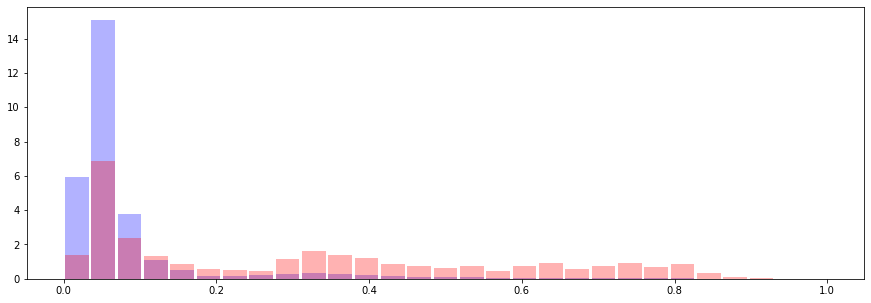

In [28]:
plt.figure(figsize=(15,5))

plt.hist(preds[y_teste==0], bins=np.linspace(0,1,30), density=True, color='b', alpha=.3, rwidth=.9)
plt.hist(preds[y_teste==1], bins=np.linspace(0,1,30), density=True, color='r', alpha=.3, rwidth=.9)

plt.show()

## Vamos ver com o class_weight: Balanced

In [31]:
lgbm.best_estimator_

LGBMClassifier(max_depth=7, n_estimators=50, n_jobs=2, random_state=61658,
               reg_alpha=0.1)

In [35]:
lgbm2 = LGBMClassifier(random_state=61658, class_weight="balanced", **lgbm.best_params_)

lgbm2.fit(X_treino_o, y_treino)

LGBMClassifier(class_weight='balanced', max_depth=7, n_estimators=50,
               random_state=61658, reg_alpha=0.1)

In [38]:
preds = lgbm2.predict_proba(X_teste_o)[:,1]

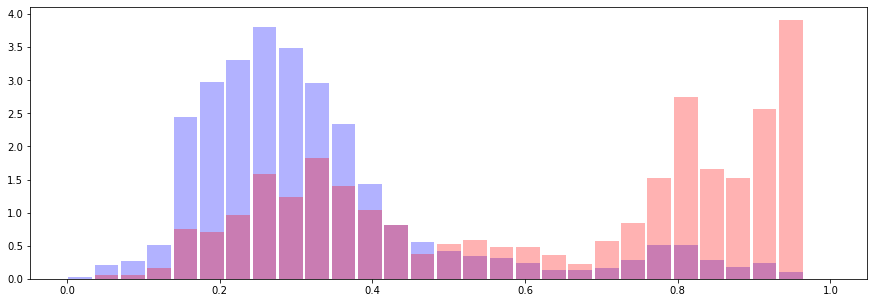

In [39]:
plt.figure(figsize=(15,5))

plt.hist(preds[y_teste==0], bins=np.linspace(0,1,30), density=True, color='b', alpha=.3, rwidth=.9)
plt.hist(preds[y_teste==1], bins=np.linspace(0,1,30), density=True, color='r', alpha=.3, rwidth=.9)

plt.show()

In [40]:
roc_auc_score(y_teste, preds)

0.7972958815862835